In [1]:
# let's mount our google drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
! git clone https://github.com/seshuad/IMagenet
! ls 'IMagenet/tiny-imagenet-200/'

Cloning into 'IMagenet'...
remote: Enumerating objects: 120594, done.
remote: Total 120594 (delta 0), reused 0 (delta 0), pack-reused 120594
Receiving objects: 100% (120594/120594), 212.68 MiB | 31.58 MiB/s, done.
Resolving deltas: 100% (1115/1115), done.
Checking out files: 100% (120206/120206), done.
test  train  val  wnids.txt  words.txt


In [0]:
import sys
import os
sys.path.append('/content/drive/My Drive/s12/')

In [0]:
# from os.path import dirname, abspath, join, isfile
# dir_location = abspath(dirname('/content/drive/s12/'))
# print(dir_location)
# sys.path.extend([join(dir_location, "utils")])

In [0]:
import numpy as np
import cv2
import io
from torch.utils.data import DataLoader, Dataset
#from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision import transforms
import zipfile
import torchvision.datasets.folder
 
path = 'IMagenet/tiny-imagenet-200/train'
path_val = 'IMagenet/tiny-imagenet-200/val'

import random
import math
from tiny_utils.data_utils import create_and_split_dataset, find_classes
import tiny_utils.data_utils as data_utils
import importlib
importlib.reload(data_utils)

g_classes, g_class_to_idx = find_classes(path)

train_file_names = []
test_file_names = []
train_classname_dict = dict()    
test_classname_dict = dict()      
classes_dict = dict()

train_file_names, test_file_names, train_classname_dict, test_classname_dict, classes_dict = create_and_split_dataset(path,g_class_to_idx)

print('n02085620_0.JPEG=',classes_dict['n02085620_0.JPEG'])
print('n02085620_22.JPEG=',classes_dict['n02085620_22.JPEG'])

#Train and, Test data
data_dict = dict()
data_dict['train_files'] = train_file_names
data_dict['test_files'] = test_file_names

from tiny_utils.imagenet_data import  ImagenetDataset
from torch.utils.data import DataLoader
from torch.utils.data import RandomSampler
from PIL import Image
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
train_tr = transforms.Compose([
                               transforms.RandomResizedCrop(32),
                               transforms.RandomHorizontalFlip(),
                               transforms.ToTensor(),
                               normalize])
test_tr = transforms.Compose([
                              transforms.ToTensor(),
                              normalize])
        
train_data = ImagenetDataset(path,train_file_names, train_classname_dict,classes_dict,transform = train_tr)
test_data = ImagenetDataset(path,test_file_names,test_classname_dict,classes_dict,test_tr)
print(test_classname_dict)

n02085620_0.JPEG= 24
n02085620_22.JPEG= 24
{'n01443537_342.JPEG': 'n01443537', 'n01443537_37.JPEG': 'n01443537', 'n01443537_379.JPEG': 'n01443537', 'n01443537_437.JPEG': 'n01443537', 'n01443537_5.JPEG': 'n01443537', 'n01443537_487.JPEG': 'n01443537', 'n01443537_248.JPEG': 'n01443537', 'n01443537_447.JPEG': 'n01443537', 'n01443537_446.JPEG': 'n01443537', 'n01443537_159.JPEG': 'n01443537', 'n01443537_415.JPEG': 'n01443537', 'n01443537_236.JPEG': 'n01443537', 'n01443537_365.JPEG': 'n01443537', 'n01443537_383.JPEG': 'n01443537', 'n01443537_361.JPEG': 'n01443537', 'n01443537_441.JPEG': 'n01443537', 'n01443537_382.JPEG': 'n01443537', 'n01443537_290.JPEG': 'n01443537', 'n01443537_404.JPEG': 'n01443537', 'n01443537_419.JPEG': 'n01443537', 'n01443537_20.JPEG': 'n01443537', 'n01443537_271.JPEG': 'n01443537', 'n01443537_34.JPEG': 'n01443537', 'n01443537_431.JPEG': 'n01443537', 'n01443537_39.JPEG': 'n01443537', 'n01443537_95.JPEG': 'n01443537', 'n01443537_256.JPEG': 'n01443537', 'n01443537_395.JPE

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from albumentations import Compose, RandomCrop, Normalize, HorizontalFlip, Resize
from albumentations.pytorch import ToTensor
from models import resnet_18 as resnet18
from transformation import alb_img_tiny as imnet

from tiny_utils.global_fun import show_summary, run_model_with_entropy,  draw_accuracy_loss_change_graps, plot_accuracy_loss_graphs

import importlib
importlib.reload(resnet18)
importlib.reload(imnet)

use_cuda = torch.cuda.is_available()
print(use_cuda)
#device = torch.device("cuda" if use_cuda else "cpu")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)
CUDA_LAUNCH_BLOCKING=1
imagenet_num_classes = 200
model = resnet18.ResNet18(imagenet_num_classes).to(device)
criterion = torch.nn.CrossEntropyLoss()
importlib.reload(imnet)


imagenet_model = imnet.Imagenet_Alb(model,train_data,test_data,criterion,None,None)

SEED = 1
# CUDA?
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)
show_summary(imagenet_model,input_size=(3,32,32))


True
cuda:0
CUDA Available? True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      

In [0]:
# !pip install torch-lr-finder -v --global-option="amp"

  pip install torch-lr-finder -v --global-option="amp"


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
Max Accuracy = 10.15625 at LR = 4.027170343254588


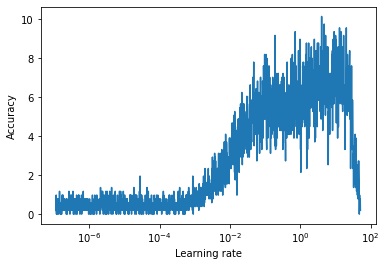

In [0]:
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
#from torchvision.datasets import CIFAR10
import lr_finder as lrfinder
import tiny_utils.imagenet_data as imdataset
import importlib

#criterion = nn.CrossEntropyLoss()
importlib.reload(data_utils)
importlib.reload(lrfinder)
importlib.reload(imdataset)

optimizer = optim.SGD(imagenet_model.m_model.parameters(), lr=1e-7)
lr_finder = lrfinder.LRFinder(imagenet_model.m_model, optimizer, criterion, device="cuda")
lr_finder.range_test(imagenet_model.m_train_loader, end_lr=100, num_iter=2000, step_mode="exp")
lr_finder.plot(skip_end=0, accuracy_flag = True)
lr_finder.reset()

In [0]:
#ONECYLE LR SET OPTIMIZER AND SCHEDULER

In [0]:
from tiny_utils.global_fun import test_model
from tiny_utils.global_fun import train_model
from tiny_utils.global_fun import show_summary, run_model_with_entropy,  draw_accuracy_loss_change_graps, plot_accuracy_loss_graphs

import tiny_utils.global_fun as fun
from models import resnet_18 as resnet18
from transformation import alb_img_tiny as imnet
#import OneCycleLR_A11 as oneCycle 
# import lr_finder
import OneCycleLR_A11 as oneCycle

import importlib
importlib.reload(resnet18)
importlib.reload(oneCycle)
importlib.reload(imnet)
importlib.reload(fun) 
#from torch.optim.lr_scheduler import OneCycleLR
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9,weight_decay=5e-04)

lr_max = 0.2630267991895384
lr_min = lr_max / 100
batch_size = 200
iterations = 100000/batch_size

scheduler = oneCycle.OneCycleLR_A11(optimizer, 24, iterations, (lr_min, lr_max), (0.8, 0.95))

imagenet_model.setOptimizer(optimizer)
imagenet_model.setScheduler(scheduler)
    

In [0]:
#Run with regulariazation

In [0]:
run_model_with_entropy(imagenet_model, device, doL1= 1, doL2=1, LAMBDA=0.0005, EPOCHS=50)

  0%|          | 0/137 [00:00<?, ?it/s]

EPOCH: 0
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 0


Loss=4.6993937492370605 Batch_id=136 Accuracy=3.79: 100%|██████████| 137/137 [01:09<00:00,  1.96it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0099, Accuracy: 1093/30000 (3.64%)

EPOCH: 1
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 1


Loss=4.396765232086182 Batch_id=136 Accuracy=7.55: 100%|██████████| 137/137 [01:10<00:00,  1.95it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0092, Accuracy: 1767/30000 (5.89%)

EPOCH: 2
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 2


Loss=4.124320030212402 Batch_id=136 Accuracy=11.34: 100%|██████████| 137/137 [01:10<00:00,  1.95it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0090, Accuracy: 2034/30000 (6.78%)

EPOCH: 3
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 3


Loss=3.6607208251953125 Batch_id=136 Accuracy=14.50: 100%|██████████| 137/137 [01:10<00:00,  1.95it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 4067/30000 (13.56%)

EPOCH: 4
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 4


Loss=3.6834065914154053 Batch_id=136 Accuracy=17.56: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0075, Accuracy: 5251/30000 (17.50%)

EPOCH: 5
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 5


Loss=3.6700844764709473 Batch_id=136 Accuracy=19.89: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 4487/30000 (14.96%)

EPOCH: 6
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 6


Loss=3.5214600563049316 Batch_id=136 Accuracy=21.93: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 4845/30000 (16.15%)

EPOCH: 7
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 7


Loss=3.3852617740631104 Batch_id=136 Accuracy=23.97: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 5583/30000 (18.61%)

EPOCH: 8
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 8


Loss=3.314448118209839 Batch_id=136 Accuracy=25.63: 100%|██████████| 137/137 [01:10<00:00,  1.95it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 4180/30000 (13.93%)

EPOCH: 9
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 9


Loss=3.2161154747009277 Batch_id=136 Accuracy=27.41: 100%|██████████| 137/137 [01:10<00:00,  1.95it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 6481/30000 (21.60%)

EPOCH: 10
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 10


Loss=3.1112585067749023 Batch_id=136 Accuracy=28.73: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 7531/30000 (25.10%)

EPOCH: 11
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 11


Loss=2.869656801223755 Batch_id=136 Accuracy=30.22: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 4587/30000 (15.29%)

EPOCH: 12
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 12


Loss=2.8926374912261963 Batch_id=136 Accuracy=31.29: 100%|██████████| 137/137 [01:10<00:00,  1.95it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 4428/30000 (14.76%)

EPOCH: 13
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 13


Loss=2.8261423110961914 Batch_id=136 Accuracy=32.18: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7621/30000 (25.40%)

EPOCH: 14
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 14


Loss=2.700592279434204 Batch_id=136 Accuracy=33.31: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 5079/30000 (16.93%)

EPOCH: 15
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 15


Loss=2.784261703491211 Batch_id=136 Accuracy=34.23: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 5140/30000 (17.13%)

EPOCH: 16
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 16


Loss=2.8342463970184326 Batch_id=136 Accuracy=34.87: 100%|██████████| 137/137 [01:10<00:00,  1.95it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 7990/30000 (26.63%)

EPOCH: 17
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 17


Loss=2.7933356761932373 Batch_id=136 Accuracy=35.70: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 7192/30000 (23.97%)

EPOCH: 18
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 18


Loss=2.6891396045684814 Batch_id=136 Accuracy=36.10: 100%|██████████| 137/137 [01:10<00:00,  1.95it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 4781/30000 (15.94%)

EPOCH: 19
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 19


Loss=2.6658682823181152 Batch_id=136 Accuracy=36.83: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 7054/30000 (23.51%)

EPOCH: 20
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 20


Loss=2.593007802963257 Batch_id=136 Accuracy=37.51: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8602/30000 (28.67%)

EPOCH: 21
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 21


Loss=2.6541831493377686 Batch_id=136 Accuracy=37.85: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 6784/30000 (22.61%)

EPOCH: 22
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 22


Loss=2.588852882385254 Batch_id=136 Accuracy=38.64: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7921/30000 (26.40%)

EPOCH: 23
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 23


Loss=2.846773147583008 Batch_id=136 Accuracy=38.74: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7737/30000 (25.79%)

EPOCH: 24
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 24


Loss=2.371459722518921 Batch_id=136 Accuracy=39.33: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 9527/30000 (31.76%)

EPOCH: 25
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 25


Loss=2.5297815799713135 Batch_id=136 Accuracy=39.87: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7670/30000 (25.57%)

EPOCH: 26
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 26


Loss=2.6235623359680176 Batch_id=136 Accuracy=40.25: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 6669/30000 (22.23%)

EPOCH: 27
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 27


Loss=2.538142442703247 Batch_id=136 Accuracy=40.69: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 8246/30000 (27.49%)

EPOCH: 28
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 28


Loss=2.439227342605591 Batch_id=136 Accuracy=40.97: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 9052/30000 (30.17%)

EPOCH: 29
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 29


Loss=2.433025360107422 Batch_id=136 Accuracy=41.63: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 8492/30000 (28.31%)

EPOCH: 30
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 30


Loss=2.4265007972717285 Batch_id=136 Accuracy=41.41: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 9381/30000 (31.27%)

EPOCH: 31
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 31


Loss=2.410548448562622 Batch_id=136 Accuracy=42.06: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 9055/30000 (30.18%)

EPOCH: 32
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 32


Loss=2.5675857067108154 Batch_id=136 Accuracy=42.35: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 8072/30000 (26.91%)

EPOCH: 33
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 33


Loss=2.6000707149505615 Batch_id=136 Accuracy=42.56: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7836/30000 (26.12%)

EPOCH: 34
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 34


Loss=2.4874014854431152 Batch_id=136 Accuracy=42.84: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8972/30000 (29.91%)

EPOCH: 35
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 35


Loss=2.5379815101623535 Batch_id=136 Accuracy=43.17: 100%|██████████| 137/137 [01:10<00:00,  1.93it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7474/30000 (24.91%)

EPOCH: 36
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 36


Loss=2.537635087966919 Batch_id=136 Accuracy=43.62: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 9627/30000 (32.09%)

EPOCH: 37
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 37


Loss=2.4233853816986084 Batch_id=136 Accuracy=43.68: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8868/30000 (29.56%)

EPOCH: 38
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 38


Loss=2.3079781532287598 Batch_id=136 Accuracy=43.72: 100%|██████████| 137/137 [01:10<00:00,  1.95it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 9090/30000 (30.30%)

EPOCH: 39
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 39


Loss=2.3660409450531006 Batch_id=136 Accuracy=43.87: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7911/30000 (26.37%)

EPOCH: 40
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 40


Loss=2.3246846199035645 Batch_id=136 Accuracy=44.26: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8981/30000 (29.94%)

EPOCH: 41
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 41


Loss=2.5767598152160645 Batch_id=136 Accuracy=44.63: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 9443/30000 (31.48%)

EPOCH: 42
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 42


Loss=2.3887178897857666 Batch_id=136 Accuracy=44.64: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 9729/30000 (32.43%)

EPOCH: 43
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 43


Loss=2.4098949432373047 Batch_id=136 Accuracy=45.16: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 9130/30000 (30.43%)

EPOCH: 44
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 44


  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8818/30000 (29.39%)

EPOCH: 45
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 45


Loss=2.2174675464630127 Batch_id=136 Accuracy=45.34: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 9267/30000 (30.89%)

EPOCH: 46
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 46


Loss=2.4266533851623535 Batch_id=136 Accuracy=45.48: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 9799/30000 (32.66%)

EPOCH: 47
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 47


Loss=2.4407379627227783 Batch_id=136 Accuracy=45.59: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 9834/30000 (32.78%)

EPOCH: 48
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 48


Loss=2.28531551361084 Batch_id=136 Accuracy=45.57: 100%|██████████| 137/137 [01:10<00:00,  1.93it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 9134/30000 (30.45%)

EPOCH: 49
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 49


Loss=2.2578957080841064 Batch_id=136 Accuracy=45.91: 100%|██████████| 137/137 [01:10<00:00,  1.94it/s]



Test set: Average loss: 0.0067, Accuracy: 8016/30000 (26.72%)



In [0]:
print( "train data shape: ",  train_data.shape )
print( "train label shape: ", train_labels.shape )

train data shape:  (100000, 64, 64, 3)
train label shape:  (100000, 200)
